Geração:  0  | Benefício:  46.75666666666667
Geração:  1  | Benefício:  54.97666666666667
Geração:  2  | Benefício:  62.93
Geração:  3  | Benefício:  73.88333333333334
Geração:  4  | Benefício:  93.37666666666667
Geração:  5  | Benefício:  103.83333333333333
Geração:  6  | Benefício:  109.93666666666667
Geração:  7  | Benefício:  114.74666666666667
Geração:  8  | Benefício:  118.45333333333333
Geração:  9  | Benefício:  119.73333333333333
Geração:  10  | Benefício:  121.66333333333333
Geração:  11  | Benefício:  121.68333333333334
Geração:  12  | Benefício:  122.39
Geração:  13  | Benefício:  123.45666666666666
Geração:  14  | Benefício:  124.07333333333334
Geração:  15  | Benefício:  124.80333333333333
Geração:  16  | Benefício:  125.11666666666666
Geração:  17  | Benefício:  125.05333333333333
Geração:  18  | Benefício:  124.57666666666667
Geração:  19  | Benefício:  124.85333333333334
Geração:  20  | Benefício:  125.40333333333334
Geração:  21  | Benefício:  126.24333333333334
Geraç

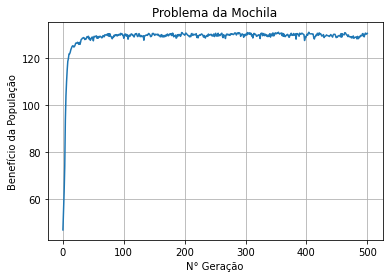

Tempo execução: 17.170257091522217


In [ ]:
import time
from random import getrandbits, randint, random
from matplotlib import pyplot as plt
pesos_e_valores = [[2, 15], [7, 60], [7, 40], [3, 10], [2.5, 10], [12, 60], [1, 4], [0.2, 2]]
peso_maximo = 20
n_de_cromossomos = 300  # Determina o tamanho da população [100,1000,2000]
geracoes = 500 # Numero de gerações [100,200,300,400,500] 
n_de_itens = len(pesos_e_valores)  # Número de Itens na Mochila


def main():
    populacao = population(n_de_cromossomos, n_de_itens)
    historico_de_fitness = [media_fitness(
        populacao, peso_maximo, pesos_e_valores)]
    for i in range(geracoes):
        populacao = evolucao(populacao, peso_maximo,
                             pesos_e_valores, n_de_cromossomos)
        historico_de_fitness.append(media_fitness(
            populacao, peso_maximo, pesos_e_valores))

    # PRINTS DO TERMINAL
    for indice, dados in enumerate(historico_de_fitness):
        print("Geração: ", indice, " | Benefício: ", dados)

    # print("\nPeso Máximo:", peso_maximo, "\n\nItens disponíveis:")
    # for indice, i in enumerate(pesos_e_valores):
    #     print("Item ", indice+1, ": ", i[0], " | Benefício", i[1])

    maior_beneficio = 0
    for i in range(0, len(historico_de_fitness)):
      if historico_de_fitness[i] > maior_beneficio:
        maior_beneficio = historico_de_fitness[i]
    
    geracao_do_maior_beneficio = historico_de_fitness.index(maior_beneficio)
    print('Melhor geração ->', geracao_do_maior_beneficio, ':', maior_beneficio)

    # print("\n5 últimos válidos: ")
    # max = len(populacao) - 1
    # ate = max - 5
    # for i in range(max, ate, -1):
    #     print(populacao[i])

    # GERADOR DE GRAFICO
    plt.plot(range(len(historico_de_fitness)), historico_de_fitness)
    plt.grid(True, zorder=0)
    plt.title("Problema da Mochila")
    plt.xlabel("N° Geração")
    plt.ylabel("Benefício da População")
    plt.show()


def individual(n_de_itens):
    # Cria um membro da populacao
    return [getrandbits(1) for x in range(n_de_itens)]


def population(n_de_individuos, n_de_itens):
    # Cria a populacao
    return [individual(n_de_itens) for x in range(n_de_individuos)]


def fitness(individuo, peso_maximo, pesos_e_valores):
    # Faz avaliacao do individuo
    peso_total, valor_total = 0, 0
    for indice, valor in enumerate(individuo):
        peso_total += (individuo[indice] * pesos_e_valores[indice][0])
        valor_total += (individuo[indice] * pesos_e_valores[indice][1])

    if (peso_maximo - peso_total) < 0:
        return -1  # retorna -1 no caso de peso excedido

    return valor_total  # se for um individuo valido retorna seu valor, sendo maior melhor


# só leva em consideracao os elementos que respeitem o peso maximo da mochila
def media_fitness(populacao, peso_maximo, pesos_e_valores):
    # Encontra a avalicao media da populacao
    soma = sum(fitness(x, peso_maximo, pesos_e_valores)
               for x in populacao if fitness(x, peso_maximo, pesos_e_valores) >= 0)
    return soma / (len(populacao))


def selecao_roleta(pais):
    # Seleciona um pai e uma mae baseado nas regras da roleta
    # O 2 parametro garante que não vai selecionar o mesmo elemento
    def sortear(fitness_total, indice_a_ignorar=-1):
        # Monta roleta para realizar o sorteio
        roleta, acumulado, valor_sorteado = [], 0, random()

        if indice_a_ignorar != -1:  # Desconta do total, o valor que sera retirado da roleta
            fitness_total -= valores[0][indice_a_ignorar]

        for indice, i in enumerate(valores[0]):
            if indice_a_ignorar == indice:  # ignora o valor ja utilizado na roleta
                continue
            acumulado += i
            roleta.append(acumulado/fitness_total)
            if roleta[-1] >= valor_sorteado:
                return indice

    # cria 2 listas com os valores fitness e os cromossomos
    valores = list(zip(*pais))
    fitness_total = sum(valores[0])

    indice_pai = sortear(fitness_total)
    indice_mae = sortear(fitness_total, indice_pai)

    pai = valores[1][indice_pai]
    mae = valores[1][indice_mae]

    return pai, mae


def evolucao(populacao, peso_maximo, pesos_e_valores, n_de_cromossomos, taxa_mutacao=0.01):
    # Tabula cada individuo e o seu fitness
    pais = [[fitness(x, peso_maximo, pesos_e_valores), x]
            for x in populacao if fitness(x, peso_maximo, pesos_e_valores) >= 0]
    pais.sort(reverse=True)

    # REPRODUCAO
    filhos = []
    while len(filhos) < n_de_cromossomos:
        pai, mae = selecao_roleta(pais)
        meio = len(pai) // 2
        # Filho recebe metade dos cromossomos do pai + metade dos cromossomos da mãe
        filho = pai[:meio] + mae[meio:]
        filhos.append(filho)

    # MUTACAO
    for individuo in filhos:
        if taxa_mutacao > random():
            posicao_para_mutar = randint(0, len(individuo)-1)
            if individuo[posicao_para_mutar] == 1:
                individuo[posicao_para_mutar] = 0
            else:
                individuo[posicao_para_mutar] = 1

    return filhos

inicio = time.time()
main()
fim = time.time()
print('Tempo execução:', fim - inicio)